- **Spectral Clustering is a growing clustering algorithm which has performed better than many traditional clustering algorithms in many cases. It treats each data point as a graph-node and thus transforms the clustering problem into a graph-partitioning problem.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import SpectralClustering 
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
sc = pd.read_csv(r"C:\Users\Shivani Dussa\Downloads\CC GENERAL.csv")
sc.shape

(8950, 18)

In [3]:
sc.drop("CUST_ID",axis = 1,inplace = True)

In [4]:
print(sc.shape)
sc.head()

(8950, 17)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [15]:
sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [16]:
sc.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [5]:
sc.MINIMUM_PAYMENTS.unique()

array([ 139.509787, 1072.340217,  627.284787, ...,   82.418369,
         55.755628,   88.288956])

In [6]:
sc.MINIMUM_PAYMENTS.fillna(sc.MINIMUM_PAYMENTS.mode()[0],inplace = True)
sc.CREDIT_LIMIT.fillna(sc.CREDIT_LIMIT.mode()[0],inplace = True)

In [6]:
sc.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [7]:
sc.duplicated().sum()

0

## Preprocessing the Data to make the data visualize

In [7]:
# scaling the data
sr = StandardScaler()
X_scaled = sr.fit_transform(sc) 

In [8]:
# normalize the data
X_normrlized = normalize(X_scaled)

In [28]:
X_normrlized

array([[-0.31209379, -0.10634984, -0.18116188, ..., -0.12884357,
        -0.22407592,  0.15378071],
       [ 0.2199114 ,  0.03753621, -0.13121341, ...,  0.02729885,
         0.06545328,  0.1007897 ],
       [ 0.1266902 ,  0.14679263, -0.03050646, ..., -0.02637715,
        -0.14890835,  0.10219408],
       ...,
       [-0.15699523, -0.03932879, -0.08523336, ..., -0.06926665,
         0.06980411, -0.87419842],
       [-0.15433999, -0.03841582, -0.09725327, ..., -0.07002601,
         0.06818368, -0.85390488],
       [-0.11522097, -0.17890273,  0.00848112, ..., -0.0652294 ,
        -0.10575816, -0.8296366 ]])

In [9]:
# converting numpy array into pandas dataframe
X_normrlized = pd.DataFrame(X_normrlized)

- **Principal Component Analysis (PCA) is one of the most commonly used unsupervised machine learning algorithms across a variety of applications: exploratory data analysis, dimensionality reduction, information compression, data de-noising, and plenty more!**


- **Principal Component Analysis**, or PCA, is a dimensionality-reduction method that is often used to **reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one** that still contains most of the information in the large set.

In [10]:
# reducing the dimensions of the data
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normrlized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ["p1","p2"]

X_principal.head()

,p1,p2
0,-0.490457,-0.679228
1,-0.518538,0.545290
2,0.330939,0.269026
3,-0.479323,-0.105610
4,-0.563841,-0.480921


In [32]:
X_principal.shape

(8950, 2)

## Building the Clustering the Models
In the below steps, two different Spectral Clustering models with different values for the parameter ‘affinity’.

In [11]:
#building the clustering model
spectral_model_rbf = SpectralClustering(n_clusters = 4,affinity = 'rbf')

# Training the model and stored the predicted cluster varaibles
rbf_ = spectral_model_rbf.fit_predict(X_principal)

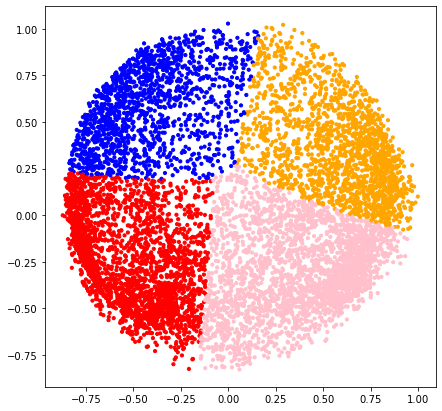

In [12]:
# building the label to our color mopping
colors = {}
colors[0] = 'orange'
colors[1] = 'r'
colors[2] = 'pink'
colors[3] = 'b'

#building the color vector for each data point
abcd = [colors[label] for label in rbf_]

# plotting the clustered scatterplot
plt.figure(figsize = (7,7))
plt.scatter(X_principal['p1'],X_principal['p2'],c = abcd,s = 10)
#plt.legend()
plt.show()

In [13]:
# building the clustering model
spectral_model_nn = SpectralClustering(n_clusters = 4,affinity = 'nearest_neighbors')

# Training the model and stored the predicted cluster varaibles
nn_ = spectral_model_nn.fit_predict(X_principal)

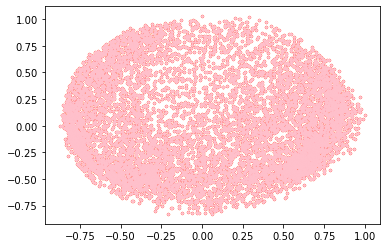

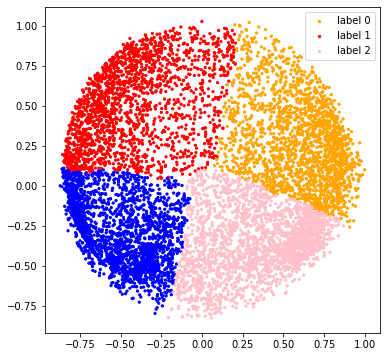

In [14]:
# building the label to our color mopping
colors = {}
colors[0] = 'orange'
colors[1] = 'r'
colors[2] = 'pink'
colors[3] = 'b'

#building the color vector for each data point
abcd = [colors[label] for label in nn_]

# plotting the clustered scattered plots
orange = plt.scatter(X_principal["p1"],X_principal["p2"],s = 5,color = 'orange')
r = plt.scatter(X_principal["p1"],X_principal["p2"],s = 5,color = 'r')
p = plt.scatter(X_principal["p1"],X_principal["p2"],s = 5,color = 'pink')
#b = plt.scatter(X_principal["p1"],X_principal["p2"],s = 5,color = 'b')
plt.figure(figsize = (6,6))
plt.scatter(X_principal["p1"],X_principal["p2"], c = abcd,s= 5)
plt.legend((orange,r,p),('label 0','label 1','label 2'))
plt.show()

## Evaluating the perfomances

In [15]:
# list of different values of affinity
affinity = ['rbf','nearest_neighbors']

# list of silhouette scores
s_scores = []

# evaluating the perfomances
s_scores.append(silhouette_score(sc,rbf_))
s_scores.append(silhouette_score(sc,nn_))
s_scores

[-0.02564447489485224, -0.056206236209574094]

## comparing the perfomances

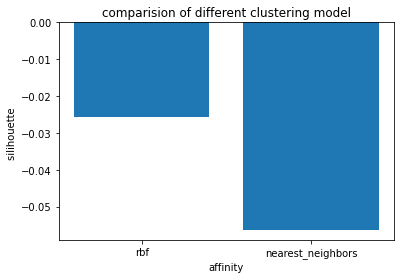

In [16]:
# ploting the bar graph to compare the models
plt.bar(affinity,s_scores)
plt.xlabel('affinity')
plt.ylabel('silihouette ')
plt.title('comparision of different clustering model')
plt.show()

In [17]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import SpectralClustering
#from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_blobs

In [19]:
import random

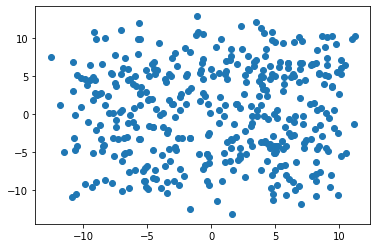

In [20]:
random.seed(1)
X,y = make_blobs(n_samples = 400,centers = 400,cluster_std = 1.5,)
plt.scatter(X[:,0],X[:,1])
plt.show()

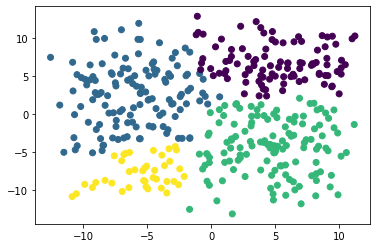

SpectralClustering(n_clusters=4)


In [24]:
sc = SpectralClustering(n_clusters = 4).fit(X)
SpectralClustering(affinity = 'rbf',assign_labels = 'kmeans',coef0 = 1,degree = 3,eigen_solver = None,
                   eigen_tol = 0.0,gamma = 1.0,kernel_params = None,n_clusters = 4,n_components = None,
                   n_init = 10,n_jobs = None,n_neighbors = 10,random_state = None)
labels = sc.labels_
plt.scatter(X[:,0],X[:,1],c = labels)
plt.show()
print(sc)

## Changing the number of Clusters

<ipython-input-39-77f571785172>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  f.add_subplot(2,2,i-1)


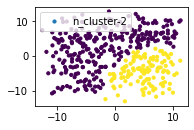

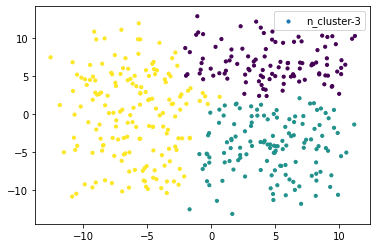

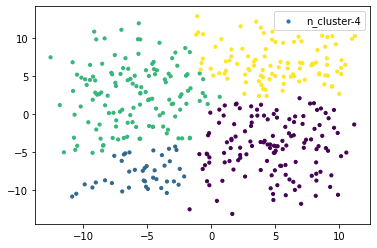

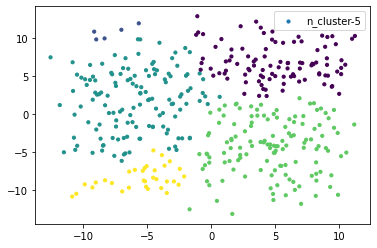

In [39]:
f = plt.figure()
f.add_subplot(2,2,1)
for i in range(2,6):
    
    sc = SpectralClustering(n_clusters = i).fit(X)
    f.add_subplot(2,2,i-1)
    plt.scatter(X[:,0],X[:,1],s = 10,c = sc.labels_,label = "n_cluster-"+str(i))
    plt.legend()
    plt.show()

#### How to do Spectral Clustering?
The three major steps involved in spectral clustering are: constructing a similarity graph, projecting data onto a lower-dimensional space, and clustering the data. Given a set of points S in a higher-dimensional space, it can be elaborated as follows:

1. Form a distance matrix
2. Transform the distance matrix into an affinity matrix A
3. Compute the degree matrix D and the Laplacian matrix L = D – A.
4. Find the eigenvalues and eigenvectors of L.
5. With the eigenvectors of k largest eigenvalues computed from the previous step form a matrix.
6. Normalize the vectors.
7. Cluster the data points in k-dimensional space